In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import splitting and imputing functions
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# turn off pink boxes for demo
import warnings
warnings.filterwarnings("ignore")

In [2]:
dataset = pd.read_csv("Wine.csv")
print('shape:', dataset.shape)
dataset.head()

shape: (177, 14)


,1,14.23,1.71,2.43,15.6,127,2.8,3.06,.28,2.29,5.64,1.04,3.92,1065
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       177 non-null    int64  
 1   14.23   177 non-null    float64
 2   1.71    177 non-null    float64
 3   2.43    177 non-null    float64
 4   15.6    177 non-null    float64
 5   127     177 non-null    int64  
 6   2.8     177 non-null    float64
 7   3.06    177 non-null    float64
 8   .28     177 non-null    float64
 9   2.29    177 non-null    float64
 10  5.64    177 non-null    float64
 11  1.04    177 non-null    float64
 12  3.92    177 non-null    float64
 13  1065    177 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.5 KB


In [4]:
dataset.columns= ['class', 'alcohol_content', 'mailic_acid', 'ash','alcalinity_of_ash', 'magneisum',  'total_phenols', 
             'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue',
             'od280_od315_of_dilutedwines', 'proline']

In [5]:
dataset.head()

,class,alcohol_content,mailic_acid,ash,alcalinity_of_ash,magneisum,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315_of_dilutedwines,proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


In [6]:
dataset.describe()

,class,alcohol_content,mailic_acid,ash,alcalinity_of_ash,magneisum,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315_of_dilutedwines,proline
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,1.943503,12.993672,2.339887,2.366158,19.516949,99.587571,2.292260,2.023446,0.362316,1.586949,5.054802,0.956983,2.604294,745.096045
std,0.773991,0.808808,1.119314,0.275080,3.336071,14.174018,0.626465,0.998658,0.124653,0.571545,2.324446,0.229135,0.705103,314.884046
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.360000,1.600000,2.210000,17.200000,88.000000,1.740000,1.200000,0.270000,1.250000,3.210000,0.780000,1.930000,500.000000
50%,2.000000,13.050000,1.870000,2.360000,19.500000,98.000000,2.350000,2.130000,0.340000,1.550000,4.680000,0.960000,2.780000,672.000000
75%,3.000000,13.670000,3.100000,2.560000,21.500000,107.000000,2.800000,2.860000,0.440000,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


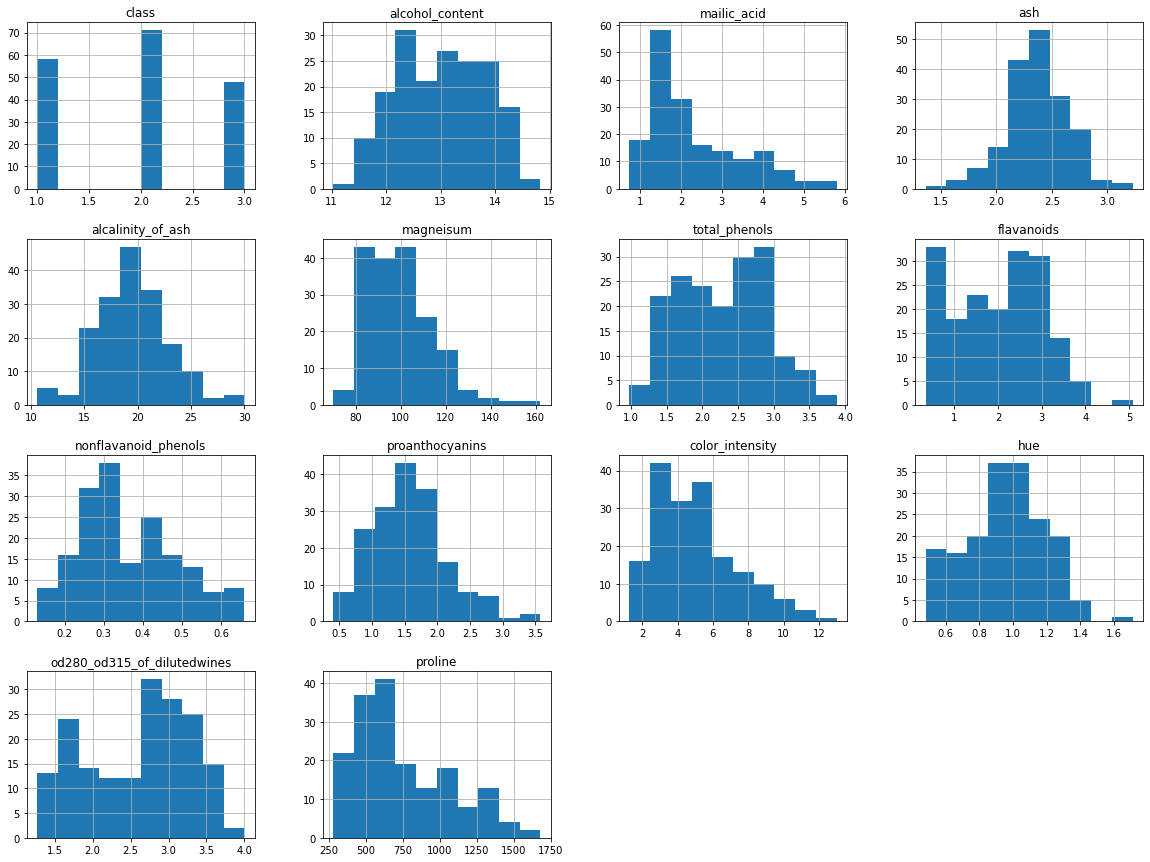

In [7]:
dataset.hist(figsize=(20, 15))
plt.show()

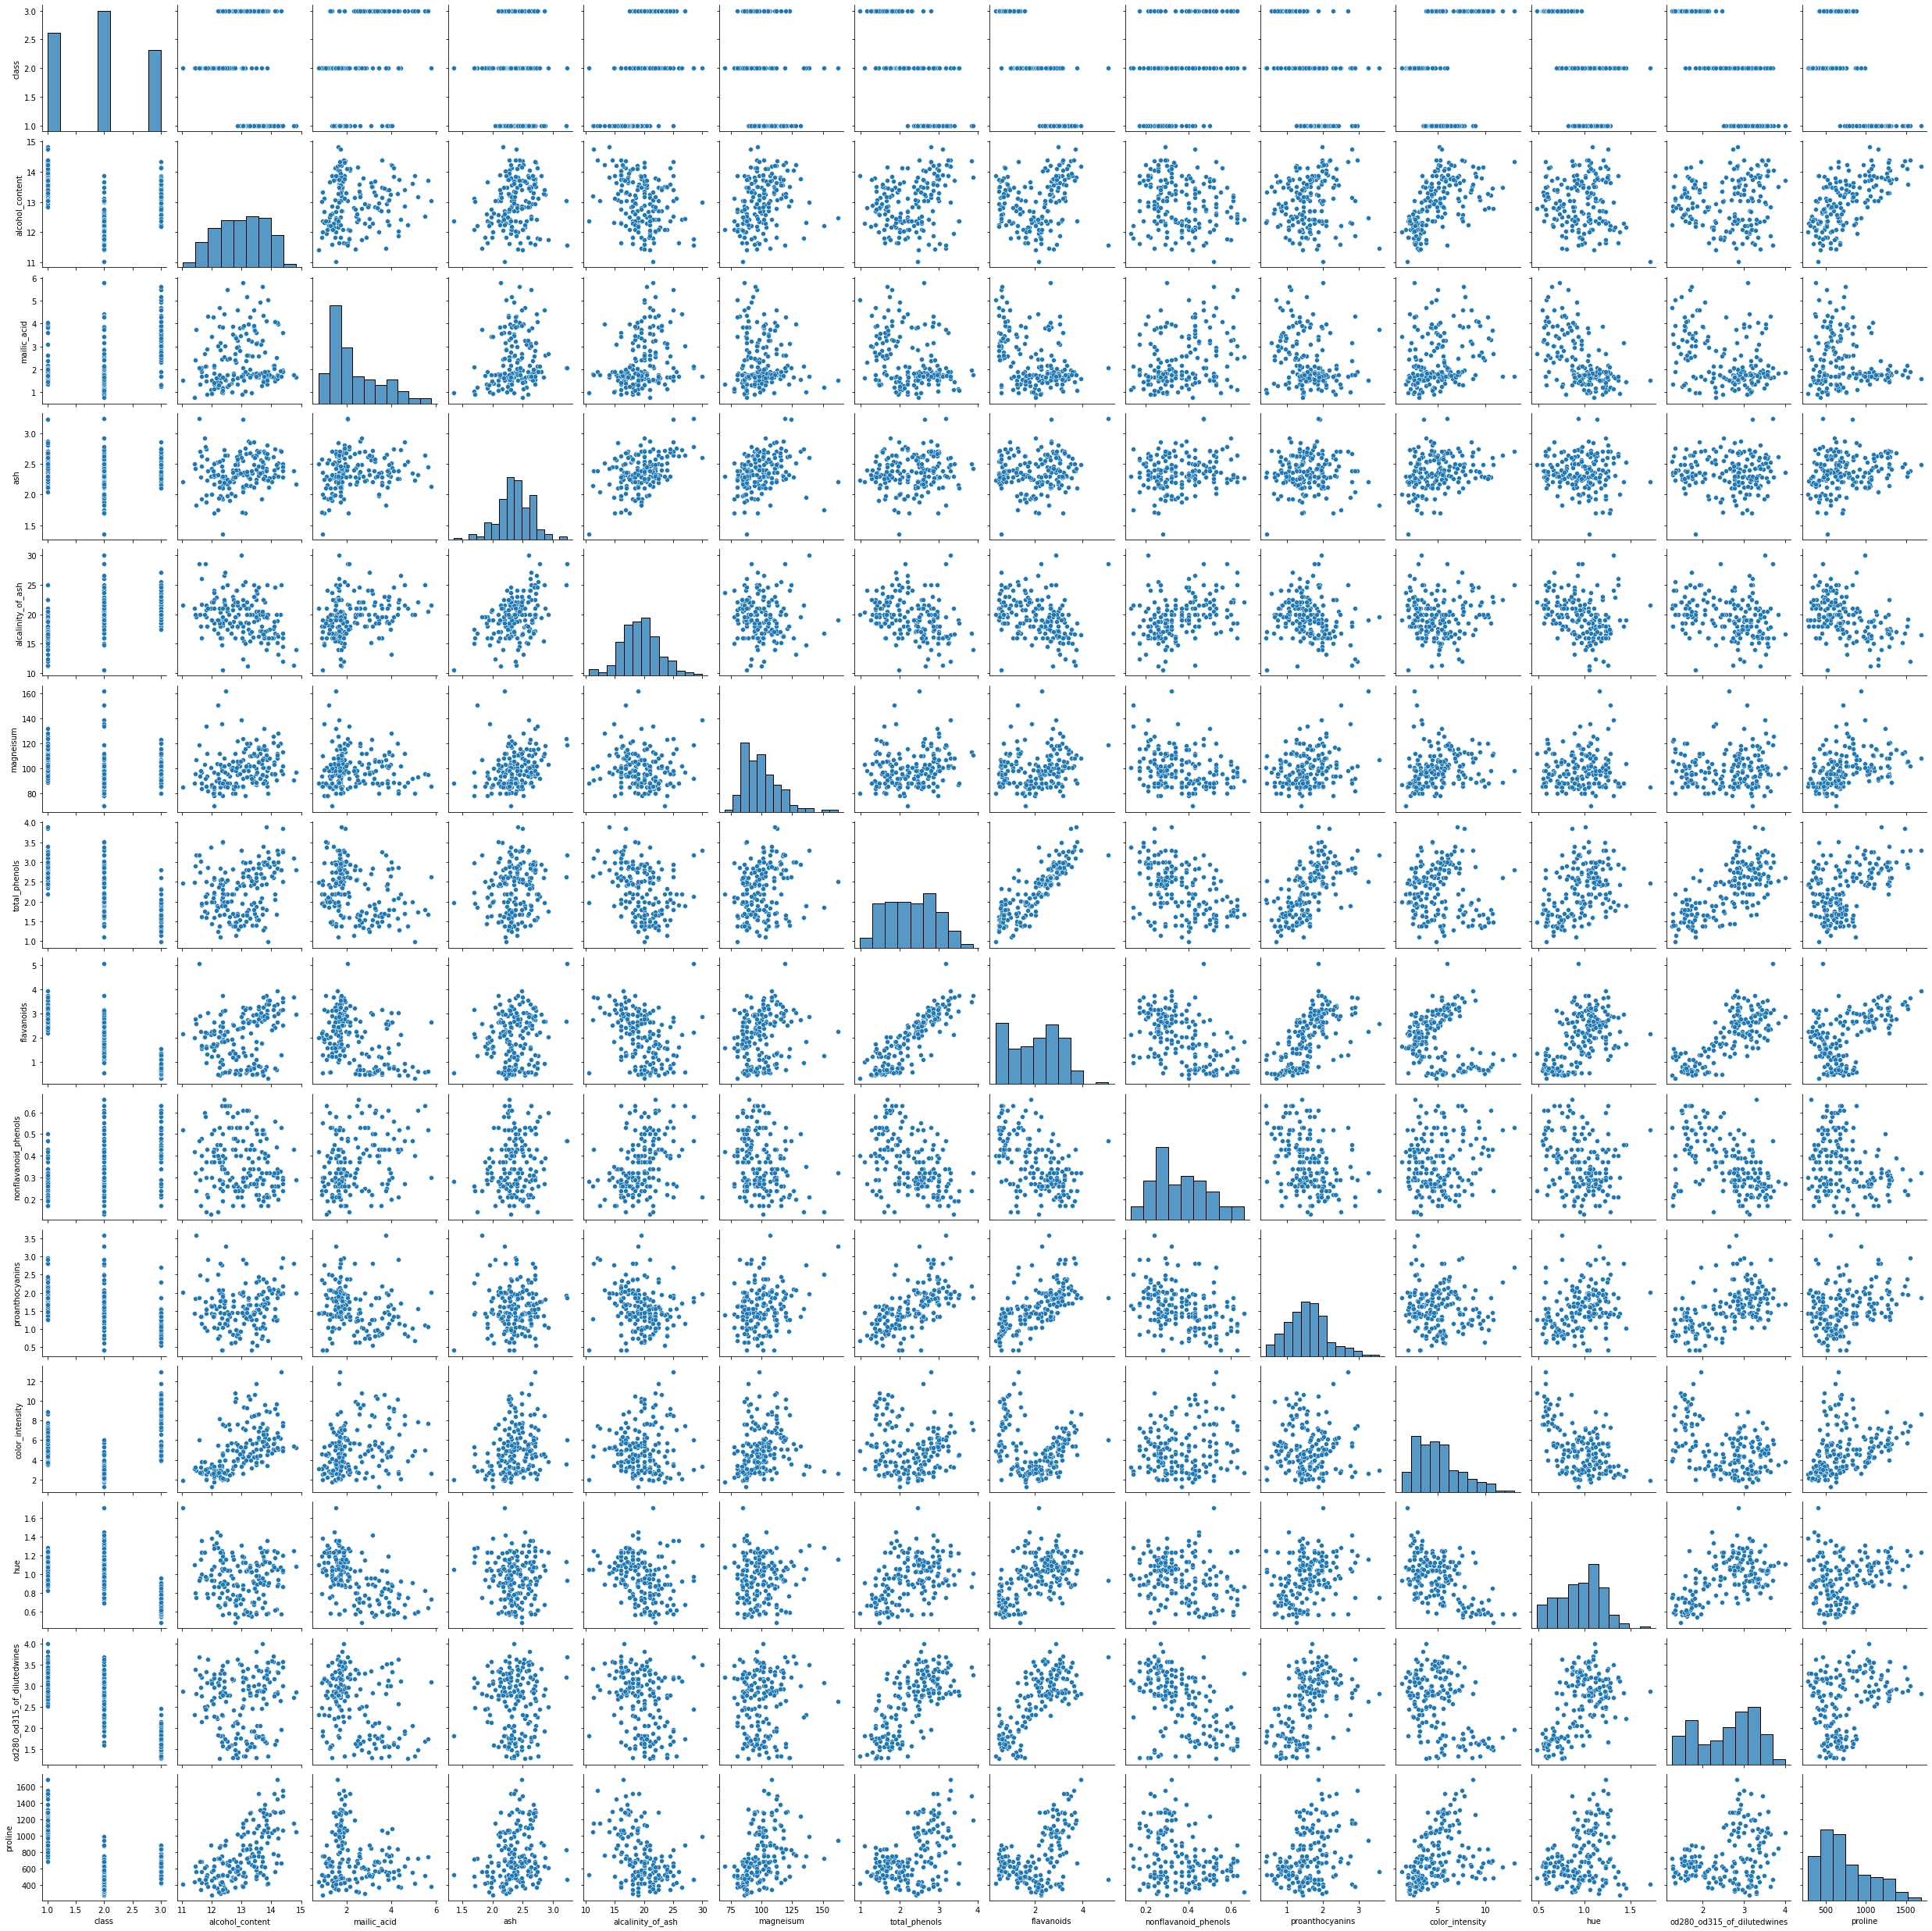

In [8]:
sns.pairplot(dataset)

<AxesSubplot:xlabel='class', ylabel='count'>

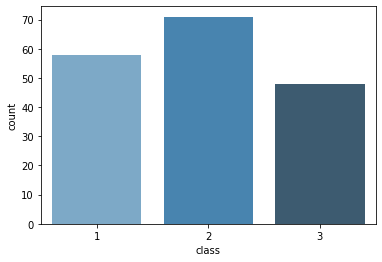

In [9]:
sns.countplot(dataset['class'], palette='Blues_d')

In [11]:
df = dataset.drop(columns=['class']).corr()
df

,alcohol_content,mailic_acid,ash,alcalinity_of_ash,magneisum,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280_od315_of_dilutedwines,proline
alcohol_content,1.000000,0.099963,0.210964,-0.303350,0.258742,0.284543,0.230133,-0.151445,0.127561,0.547883,-0.075375,0.057417,0.641068
mailic_acid,0.099963,1.000000,0.164955,0.286148,-0.049049,-0.333512,-0.409324,0.291501,-0.217975,0.250053,-0.560854,-0.366720,-0.189512
ash,0.210964,0.164955,1.000000,0.446698,0.287107,0.128176,0.114084,0.187354,0.008082,0.258643,-0.075181,0.001503,0.222979
alcalinity_of_ash,-0.303350,0.286148,0.446698,1.000000,-0.071707,-0.317583,-0.346922,0.359395,-0.190779,0.020478,-0.272719,-0.268186,-0.436858
magneisum,0.258742,-0.049049,0.287107,-0.071707,1.000000,0.208200,0.187101,-0.252091,0.226504,0.199337,0.052042,0.046961,0.387542
total_phenols,0.284543,-0.333512,0.128176,-0.317583,0.208200,1.000000,0.864046,-0.448301,0.610533,-0.056401,0.432987,0.699566,0.495839
flavanoids,0.230133,-0.409324,0.114084,-0.346922,0.187101,0.864046,1.000000,-0.536326,0.650254,-0.174411,0.543208,0.786372,0.491180
nonflavanoid_phenols,-0.151445,0.291501,0.187354,0.359395,-0.252091,-0.448301,-0.536326,1.000000,-0.363268,0.140192,-0.261709,-0.501859,-0.308886
proanthocyanins,0.127561,-0.217975,0.008082,-0.190779,0.226504,0.610533,0.650254,-0.363268,1.000000,-0.027112,0.294397,0.513415,0.325731
color_intensity,0.547883,0.250053,0.258643,0.020478,0.199337,-0.056401,-0.174411,0.140192,-0.027112,1.000000,-0.522615,-0.435744,0.315632


In [10]:
plt.figure(figsize=(20, 15))
sns.heatmap(df, axis=1).corr(). annot=True)

SyntaxError: expression cannot contain assignment, perhaps you meant "=="? (<ipython-input-10-a1226ecbf73f>, line 2)

In [ ]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr, ax=ax, cmap=sns.diverging_palette(20, 220, n=200), square=True, annot=True, cbar_kws={'shrink': .8})
ax.set_xticklabels(df.columns, rotation=45, horizontalalignment='right');

In [ ]:
X = df.drop(['class'], axis=1)
Y = df['class']

In [ ]:
random_state = 123
X_train, X_test,Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=random_state, shuffle=True)

In [ ]:
estimator = LogisticRegression(solver = 'liblinear', multi_class = 'auto')
selector = RFECV(estimator, step=1, cv = StratifiedKFold(10));
selector.fit(X, Y);

In [ ]:
plt.figure()
plt.xlabel('Number of Features')
plt.ylabel('Cross Validation Score')
grid_scores = plt.plot(range(1, len(selector.grid_scores_) +1), selector.grid_scores_, zorder = 3);
best_number = plt.scatter(selector.n_features_, np.max(selector.grid_scores_), color = 'red', zorder = 5);
plt.legend([best_number], ['Optimal Number of Features'], loc = 'lower right');

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier

In [ ]:
classifiers = []
classifiers.append(('Logistic Regression', LogisticRegression(solver='liblinear', multi_class='auto')))
classifiers.append(('Support Vector Classifier', SVC(kernel='linear')))
classifiers.append(('K-Nearest Neighbors',KNeighborsClassifier(n_neighbors=3)))
classifiers.append(('Decision Tree', DecisionTreeClassifier()))
classifiers.append(('Multi-Layer Perceptron', MLPClassifier(hidden_layer_sizes=(15),solver='sgd',learning_rate_init=0.01,max_iter=500)))


In [ ]:
kfold = StratifiedKFold(n_splits=10, random_state=None)
cv_results = []
for name, classifier in classifiers:
    result = cross_val_score(classifier, X, Y, cv=kfold);
    cv_results.append((name, result));

In [ ]:
results = pd.DataFrame(cv_results, columns=['classifier','cvscore'])
results['cvscore'] = [np.mean(i) for i in results['cvscore']]

In [ ]:
sns.set_style('whitegrid')
ax = sns.barplot(x='cvscore',y='classifier', data=results.sort_values('cvscore'), palette='Blues_d')
ax.set(xlabel='Cross Validation Score', ylabel='');

In [ ]:
print('The best performing model is: %s\nWith Cross-Validation Score of: %.2f' % (results.iloc[results['cvscore'].idxmax()][0], results.iloc[results['cvscore'].idxmax()][1]))

In [ ]:
estimator = LogisticRegression()
estimator.fit(X_train, Y_train)
Y_predict = estimator.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
print('Prediction accuracy is: %.2f' % (100*accuracy_score(Y_predict, Y_test)))

In [ ]:
X_test[Y_predict != Y_test]